In [2]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
options = Options()
options.add_experimental_option("detach", True)

driver = webdriver.Edge(
    service=Service('driver/msedgedriver.exe'),
    options=options
)

driver.get('https://www.set.or.th/th/market/index/set100/overview')

In [4]:
data = driver.page_source   

In [5]:
df = pd.read_html(data)[1]
columns = []
for c in df.columns:
    columns.append(c.replace('(Click to sort Ascending)', '').strip())
df.columns = columns
df = df.set_index('หลักทรัพย์')

In [6]:
df.to_excel('output/set100.xlsx')
df.head()

,เปิด,สูงสุด,ต่ำสุด,ล่าสุด,เปลี่ยนแปลง,% เปลี่ยนแปลง,เสนอซื้อ,เสนอขาย,ปริมาณ (หุ้น),มูลค่า ('000 บาท)
หลักทรัพย์,,,,,,,,,,
AAV,1.92,1.95,1.90,1.91,0.00,0.00,1.91,1.92,18915548,36370.69
ACE,1.48,1.49,1.46,1.47,-0.01,-0.68,1.47,1.48,6141290,9094.83
ADVANC,218.00,219.00,217.00,219.00,1.00,0.46,218.00,219.00,2297806,501503.18
AMATA,25.25,26.00,25.00,25.75,0.75,3.00,25.50,25.75,3617216,92569.27
AOT,59.25,59.50,58.00,58.50,-1.00,-1.68,58.50,58.75,55345253,3236488.71


Text(0, 0.5, 'Frequency')

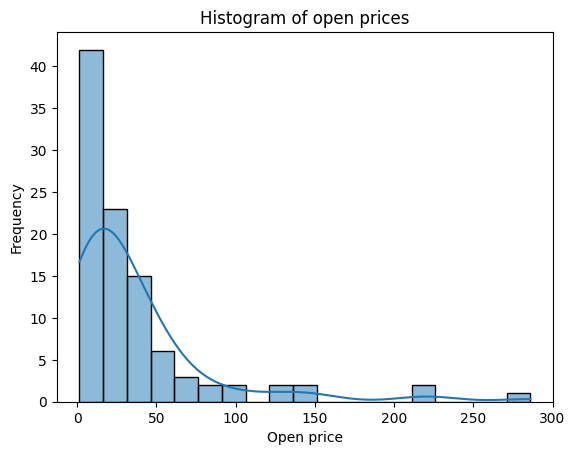

In [7]:
sns.histplot(data=df, x='เปิด', kde=True)
plt.title('Histogram of open prices')
plt.xlabel('Open price')
plt.ylabel('Frequency')